In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

BATCH_SIZE = 128
BUFFER_SIZE = 10000
EPOCHS = 6
LEARNING_RATE = 0.001

(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

def normalize_img(image, label):
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache().shuffle(ds_info.splits['train'].num_examples).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE).batch(BATCH_SIZE).cache().prefetch(tf.data.AUTOTUNE)

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
  ds_train,
  epochs=EPOCHS,
  validation_data=ds_test,
)

model.save('model.keras')

# model = tf.keras.models.load_model('model.keras')

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
Epoch 1/6
469/469 [==============================] - 15s 10ms/step - loss: 0.3534 - sparse_categorical_accuracy: 0.9021 - val_loss: 0.1892 - val_sparse_categorical_accuracy: 0.9441
Epoch 2/6
469/469 [==============================] - 2s 4ms/step - loss: 0.1592 - sparse_categorical_accuracy: 0.9546 - val_loss: 0.1320 - val_sparse_categorical_accuracy: 0.9615
Epoch 3/6
469/469 [==============================] - 2s 4ms/step - loss: 0.1140 - sparse_categorical_accuracy: 0.9676 - val_loss: 0.1091 - val_sparse_categorical_accuracy: 0.9672
Epoch 4/6
469/469 [==============================] - 2s 4ms/step - loss: 0.0889 - sparse_categorical_accuracy: 0.9747 - val_loss: 0.0971 - val_sparse_categorical_accuracy: 0.9722
Epoch 5/6
469/469 [==============================] - 2s 4ms/step - loss: 0.0710 - sparse_categorical_accuracy: 0.9793 - val_loss: 0.0911 - val_sparse_categorical_a

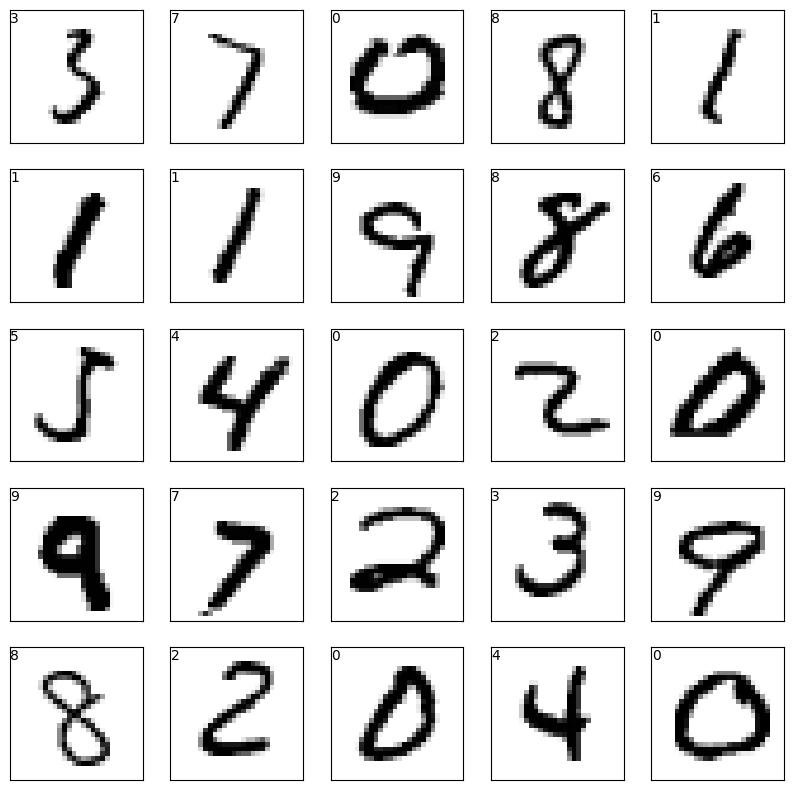

4/4 [==============================] - 0s 3ms/step


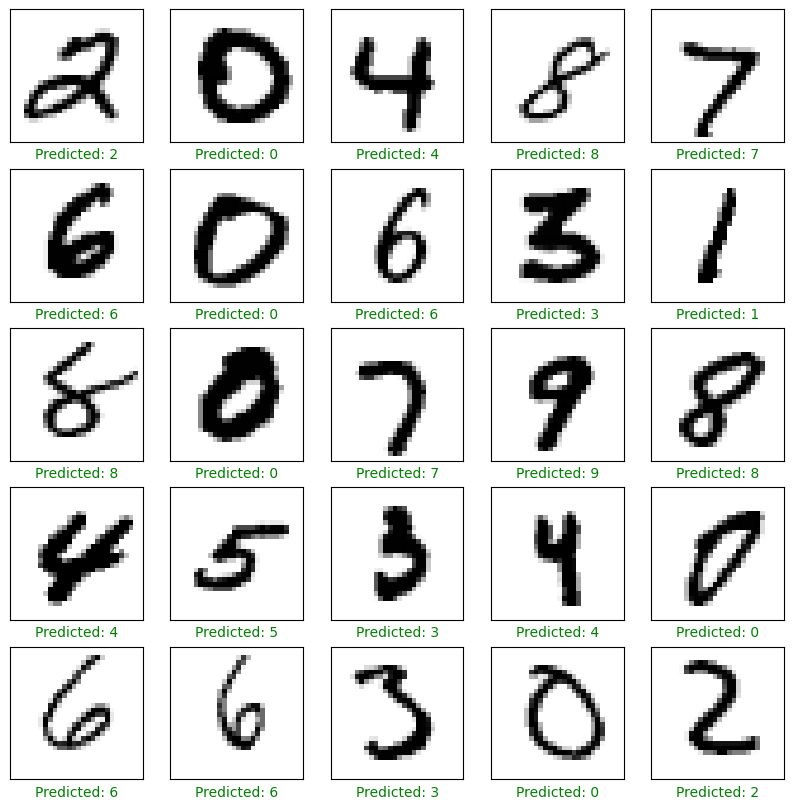

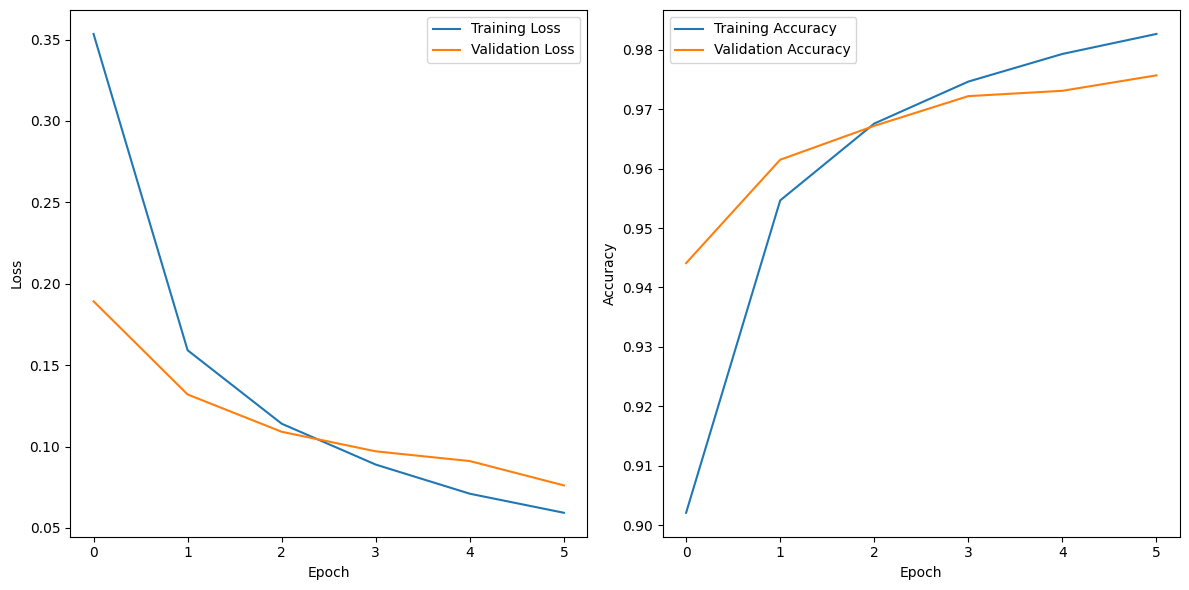

In [2]:
train_images, train_labels = next(iter(ds_train))
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.annotate(str(train_labels[i].numpy()), xy=(0.5, -0.15), ha='center', va='top', fontsize=10)
plt.show()

test_images, test_labels = next(iter(ds_test))
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[i], cmap=plt.cm.binary)

  if predicted_labels[i] == test_labels[i]:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel(f"Predicted: {predicted_labels[i]}", color=color)
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['sparse_categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()